In [62]:
import pandas as pd
import sqlalchemy as db
import matplotlib.pyplot as plt

In [63]:
engine = db.create_engine("sqlite:///db.sqlite")
connection = engine.connect()

In [64]:
sql=""" 
SELECT * FROM LostItem
JOIN Gare ON LostItem.code_uic_gare_origine = Gare.code_uic
JOIN Frequentation on Frequentation.code_uic = LostItem.code_uic_gare_origine

"""
df = pd.read_sql(sql,con=engine)
df_temp = pd.read_sql_table("Temperature",con=engine)


In [65]:
df

,id,code_uic_gare_origine,date,type_objet,gare,date_restitution,id,code_uic,nom_gare,code_postal,...,latitude,id,code_uic,code_postal,total_voyageurs_2016,total_voyageurs_2017,total_voyageurs_2018,total_voyageurs_2019,total_voyageurs_2020,total_voyageurs_2021
0,63da55f845a9723f14bf582ac1b9d891bde58ec1,0087723197,2016-01-01T05:29:11+00:00,"Bagagerie: sacs, valises, cartables",Lyon Part Dieu,None,eea1167107ee6d8208582f6be7cd0f9ca281cbce,0087723197,Lyon Part Dieu,69003,...,45.760559,5ca70698ff2d7b6686ebb4bdd8d432faac425bf7,0087723197,69003,32525629,34874317,32555240,32587523,19541666,26187679
1,541c4c8eeb0fdc37d432c82c3bc24e0cfadb2350,0087755009,2016-01-01T05:37:52+00:00,"Bagagerie: sacs, valises, cartables",Toulon,None,dd83934bb30804fe20c7a43a2802c12a1bc6c97b,0087755009,Toulon,83000,...,43.128370,c109457d737034960b92c3d6f50b020e215a2e82,0087755009,83000,3835728,4122788,3534118,3668509,2524370,3667722
2,9fc76f9590e95aa10556051285b76cc38a59695a,0087576207,2016-01-01T06:19:40+00:00,"Porte-monnaie / portefeuille, argent, titres",Bourges,None,a88bc09afdcca3336fff8395b85eda5a063be32a,0087576207,Bourges,18000,...,47.094145,b78170ba240a256ea77e7d64b82d703d47038d92,0087576207,18000,880015,915112,843252,980131,615575,829220
3,c1cde2fdb88372413bd5daf5113981c08a7b7012,0087111849,2016-01-01T06:31:15+00:00,"Appareils électroniques, informatiques, appare...",Marne-la-Vallée Chessy,2016-01-03T17:15:09+00:00,eb9b3a50ca0690c7d88a69ca8fe6b24965b71182,0087111849,Marne-la-Vallée Chessy,77111,...,48.869856,43a30fde000a76d44b239948432a8453b2cc7322,0087111849,77111,5418784,6009276,5996489,5432886,2492919,3312209
4,28619cf21142ad6b549201020bea6f93263b4268,0087111849,2016-01-01T06:44:54+00:00,"Porte-monnaie / portefeuille, argent, titres",Marne-la-Vallée Chessy,None,eb9b3a50ca0690c7d88a69ca8fe6b24965b71182,0087111849,Marne-la-Vallée Chessy,77111,...,48.869856,43a30fde000a76d44b239948432a8453b2cc7322,0087111849,77111,5418784,6009276,5996489,5432886,2492919,3312209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454631,1cbb7e736df918acb71d0e227d5b6643da7299e3,0087543017,2021-12-31T21:39:32+00:00,"Bagagerie: sacs, valises, cartables",Les Aubrais,None,255ad1d4ef04d016bc7e64f33e204c431f6261d7,0087543017,Les Aubrais,45400,...,47.926801,645d1b99bbb4dc66d80f5c90e03abe6240cce49f,0087543017,45400,1620529,1666961,1585092,1592924,888807,1113331
454632,35943f49e3fb5f9f36d82e1f34975b3c09a7159e,0087384008,2021-12-31T22:19:47+00:00,"Bagagerie: sacs, valises, cartables",Paris Saint-Lazare,2022-01-08T10:50:12+00:00,aec160f097233f45cb9ffa9e773fff13b19325a9,0087384008,Paris Saint-Lazare,75008,...,48.876242,b1be6c8faae4eca4be9ade5afc3873859c8c8101,0087384008,75008,108771941,109956754,108075780,107340421,114468385,91502192
454633,60ef0c8ce7ee2c9b7722f58623ac76f1f947961e,0087384008,2021-12-31T22:23:27+00:00,"Bagagerie: sacs, valises, cartables",Paris Saint-Lazare,None,aec160f097233f45cb9ffa9e773fff13b19325a9,0087384008,Paris Saint-Lazare,75008,...,48.876242,b1be6c8faae4eca4be9ade5afc3873859c8c8101,0087384008,75008,108771941,109956754,108075780,107340421,114468385,91502192
454634,8107cd28f611cb7d2c027597e94954ed761ea1c2,0087384008,2021-12-31T22:25:34+00:00,"Bagagerie: sacs, valises, cartables",Paris Saint-Lazare,None,aec160f097233f45cb9ffa9e773fff13b19325a9,0087384008,Paris Saint-Lazare,75008,...,48.876242,b1be6c8faae4eca4be9ade5afc3873859c8c8101,0087384008,75008,108771941,109956754,108075780,107340421,114468385,91502192


In [66]:
df['date'] = pd.to_datetime(df['date'])
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

In [67]:
df_temp["departement_code"] = df_temp["departement_code"].astype(str).str.zfill(2)

In [68]:
df['date'] = df['date'].dt.tz_convert(None)

In [69]:
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

In [70]:
df['date'] = pd.to_datetime(df['date'])

In [71]:
df['date']

0        2016-01-01
1        2016-01-01
2        2016-01-01
3        2016-01-01
4        2016-01-01
            ...    
454631   2021-12-31
454632   2021-12-31
454633   2021-12-31
454634   2021-12-31
454635   2021-12-31
Name: date, Length: 454636, dtype: datetime64[ns]

In [72]:
df_temp["departement_code"].unique()

array(['05', '06', '10', '13', '14', '17', '18', '21', '26', '29', '31',
       '33', '34', '35', '37', '44', '51', '54', '56', '59', '61', '63',
       '65', '66', '67', '68', '69', '76', '80', '83', '86', '87'],
      dtype=object)

In [73]:
merge =pd.merge(df,df_temp,left_on=["code_departement","date"],right_on=["departement_code","Date"])

In [74]:
merge

,id,code_uic_gare_origine,date,type_objet,gare,date_restitution,id,code_uic,nom_gare,code_postal,...,total_voyageurs_2016,total_voyageurs_2017,total_voyageurs_2018,total_voyageurs_2019,total_voyageurs_2020,total_voyageurs_2021,index,departement_code,Date,temperature
0,63da55f845a9723f14bf582ac1b9d891bde58ec1,0087723197,2016-01-01,"Bagagerie: sacs, valises, cartables",Lyon Part Dieu,None,eea1167107ee6d8208582f6be7cd0f9ca281cbce,0087723197,Lyon Part Dieu,69003,...,32525629,34874317,32555240,32587523,19541666,26187679,56992,69,2016-01-01,6.7625
1,4df93f7f4e5a439eae8635af8f8af826748d2c51,0087723197,2016-01-01,"Clés, porte-clés, badge magnétique",Lyon Part Dieu,2016-01-01T09:37:39+00:00,eea1167107ee6d8208582f6be7cd0f9ca281cbce,0087723197,Lyon Part Dieu,69003,...,32525629,34874317,32555240,32587523,19541666,26187679,56992,69,2016-01-01,6.7625
2,528829485156b2af819a1c1172d5a7bf90cd78c1,0087723197,2016-01-01,"Appareils électroniques, informatiques, appare...",Lyon Part Dieu,None,eea1167107ee6d8208582f6be7cd0f9ca281cbce,0087723197,Lyon Part Dieu,69003,...,32525629,34874317,32555240,32587523,19541666,26187679,56992,69,2016-01-01,6.7625
3,d76d9a2ca5f79fcbc68faf1b01b48d4c934813b1,0087723197,2016-01-01,"Porte-monnaie / portefeuille, argent, titres",Lyon Part Dieu,2016-01-14T13:14:03+00:00,eea1167107ee6d8208582f6be7cd0f9ca281cbce,0087723197,Lyon Part Dieu,69003,...,32525629,34874317,32555240,32587523,19541666,26187679,56992,69,2016-01-01,6.7625
4,43ec098026a4da0174b9da9bf09f9a57b8e4bb7e,0087723197,2016-01-01,"Livres, articles de papéterie",Lyon Part Dieu,None,eea1167107ee6d8208582f6be7cd0f9ca281cbce,0087723197,Lyon Part Dieu,69003,...,32525629,34874317,32555240,32587523,19541666,26187679,56992,69,2016-01-01,6.7625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265230,66791f85045722a40d839a4f15ac72fe2db9c7cf,0087611004,2021-12-31,"Bagagerie: sacs, valises, cartables",Toulouse Matabiau,2022-09-01T11:24:13+00:00,6d8b1972b89253bad7fa7e39fa9eb91e46813200,0087611004,Toulouse Matabiau,31500,...,9539321,10309397,8712234,9892175,7616091,10248180,24111,31,2021-12-31,9.3000
265231,9e8badffe7a1e77a1bc77f36851e63f07fd758d9,0087611004,2021-12-31,"Bagagerie: sacs, valises, cartables",Toulouse Matabiau,2022-01-11T08:54:55+00:00,6d8b1972b89253bad7fa7e39fa9eb91e46813200,0087611004,Toulouse Matabiau,31500,...,9539321,10309397,8712234,9892175,7616091,10248180,24111,31,2021-12-31,9.3000
265232,fb7b9ddf2dd06a641a68fde738ac2e93b7b7adeb,0087611004,2021-12-31,"Bagagerie: sacs, valises, cartables",Toulouse Matabiau,2022-01-05T08:40:50+00:00,6d8b1972b89253bad7fa7e39fa9eb91e46813200,0087611004,Toulouse Matabiau,31500,...,9539321,10309397,8712234,9892175,7616091,10248180,24111,31,2021-12-31,9.3000
265233,ab6517fe6585bdce9ed4f17201941a5a46047a8c,0087611004,2021-12-31,"Vêtements, chaussures",Toulouse Matabiau,2022-01-05T08:38:41+00:00,6d8b1972b89253bad7fa7e39fa9eb91e46813200,0087611004,Toulouse Matabiau,31500,...,9539321,10309397,8712234,9892175,7616091,10248180,24111,31,2021-12-31,9.3000


In [75]:
merge.columns

Index(['id', 'code_uic_gare_origine', 'date', 'type_objet', 'gare',
       'date_restitution', 'id', 'code_uic', 'nom_gare', 'code_postal',
       'code_commune', 'code_departement', 'departement', 'longitude',
       'latitude', 'id', 'code_uic', 'code_postal', 'total_voyageurs_2016',
       'total_voyageurs_2017', 'total_voyageurs_2018', 'total_voyageurs_2019',
       'total_voyageurs_2020', 'total_voyageurs_2021', 'index',
       'departement_code', 'Date', 'temperature'],
      dtype='object')

In [76]:
merge = merge[[ 'date', 'type_objet', 'gare','code_departement', 'departement', 'longitude','latitude', 
        'total_voyageurs_2016','total_voyageurs_2017', 'total_voyageurs_2018', 'total_voyageurs_2019',
       'total_voyageurs_2020', 'total_voyageurs_2021','temperature']]

In [77]:
merge

,date,type_objet,gare,code_departement,departement,longitude,latitude,total_voyageurs_2016,total_voyageurs_2017,total_voyageurs_2018,total_voyageurs_2019,total_voyageurs_2020,total_voyageurs_2021,temperature
0,2016-01-01,"Bagagerie: sacs, valises, cartables",Lyon Part Dieu,69,Rhône,4.859355,45.760559,32525629,34874317,32555240,32587523,19541666,26187679,6.7625
1,2016-01-01,"Clés, porte-clés, badge magnétique",Lyon Part Dieu,69,Rhône,4.859355,45.760559,32525629,34874317,32555240,32587523,19541666,26187679,6.7625
2,2016-01-01,"Appareils électroniques, informatiques, appare...",Lyon Part Dieu,69,Rhône,4.859355,45.760559,32525629,34874317,32555240,32587523,19541666,26187679,6.7625
3,2016-01-01,"Porte-monnaie / portefeuille, argent, titres",Lyon Part Dieu,69,Rhône,4.859355,45.760559,32525629,34874317,32555240,32587523,19541666,26187679,6.7625
4,2016-01-01,"Livres, articles de papéterie",Lyon Part Dieu,69,Rhône,4.859355,45.760559,32525629,34874317,32555240,32587523,19541666,26187679,6.7625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265230,2021-12-31,"Bagagerie: sacs, valises, cartables",Toulouse Matabiau,31,Haute-Garonne,1.453616,43.611206,9539321,10309397,8712234,9892175,7616091,10248180,9.3000
265231,2021-12-31,"Bagagerie: sacs, valises, cartables",Toulouse Matabiau,31,Haute-Garonne,1.453616,43.611206,9539321,10309397,8712234,9892175,7616091,10248180,9.3000
265232,2021-12-31,"Bagagerie: sacs, valises, cartables",Toulouse Matabiau,31,Haute-Garonne,1.453616,43.611206,9539321,10309397,8712234,9892175,7616091,10248180,9.3000
265233,2021-12-31,"Vêtements, chaussures",Toulouse Matabiau,31,Haute-Garonne,1.453616,43.611206,9539321,10309397,8712234,9892175,7616091,10248180,9.3000


In [78]:
df_scatter = pd.DataFrame(merge[["temperature","departement"]].groupby("temperature").count().reset_index())

In [79]:
df_scatter.rename(columns = {'departement':'nombre_objet_perdu'}, inplace = True)

Text(0, 0.5, 'nombre_objet_perdu')

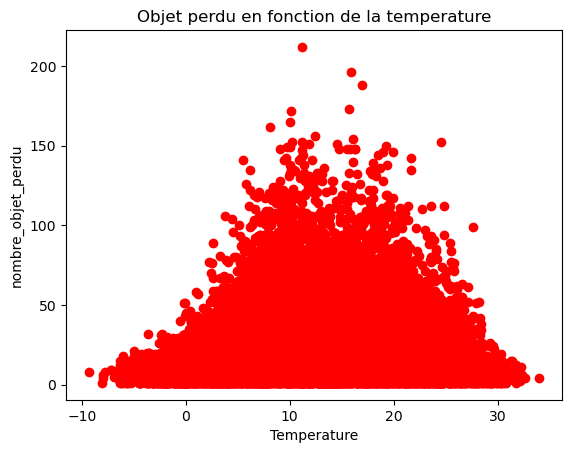

In [80]:
# Create the scatterplot with custom marker size, color, and transparency
plt.scatter(df_scatter["temperature"], df_scatter["nombre_objet_perdu"], c='red')

# Add a title and axis labels
plt.title('Objet perdu en fonction de la temperature')
plt.xlabel('Temperature')
plt.ylabel('nombre_objet_perdu')